In [3]:
#-------------------------------------------------------------------------------------JUPYTER NOTEBOOK SETTINGS-------------------------------------------------------------------------------------
from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))  

/var/folders/ry/454yhlzx6hd15j7rjv4th0lw0000gn/T/ipykernel_82570/2828031236.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import librosa
import numpy as np
import soundfile as sf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [5]:
def vtlp(signal, sr, alpha_range=(0.85, 1.15), win_length=400, hop_length=160, n_fft=512):
    alpha = np.random.uniform(alpha_range[0], alpha_range[1])
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window='hann')
    magnitude, phase = np.abs(stft), np.angle(stft)
    
    num_bins = magnitude.shape[0]
    original_bins = np.arange(0, num_bins)
    warped_bins = np.linspace(0, num_bins - 1, num_bins) * alpha
    warped_bins = np.clip(warped_bins, 0, num_bins - 1)
    
    interpolator = interp1d(original_bins, magnitude, kind='linear', axis=0, fill_value="extrapolate")
    warped_magnitude = interpolator(warped_bins)
    
    warped_stft = warped_magnitude * np.exp(1j * phase)
    warped_signal = librosa.istft(warped_stft, hop_length=hop_length, win_length=win_length, window='hann')
    
    return warped_signal

# Load the original audio file
signal, sr = librosa.load('/Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/Prototype 3/health/health_sample_1.wav', sr=16000)

# Generate and save 5 different VTLP-augmented versions
num_augmentations = 4
output_dir = '/Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/VTLP_testing/'

for i in range(num_augmentations):
    augmented_signal = vtlp(signal, sr)
    output_path = f'{output_dir}health_sample_1_vtlp_augmented_{i+1}.wav'
    sf.write(output_path, augmented_signal, sr)
    print(f'Saved VTLP-augmented file: {output_path}')

Saved VTLP-augmented file: /Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/VTLP_testing/health_sample_1_vtlp_augmented_1.wav
Saved VTLP-augmented file: /Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/VTLP_testing/health_sample_1_vtlp_augmented_2.wav
Saved VTLP-augmented file: /Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/VTLP_testing/health_sample_1_vtlp_augmented_3.wav
Saved VTLP-augmented file: /Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/VTLP_testing/health_sample_1_vtlp_augmented_4.wav


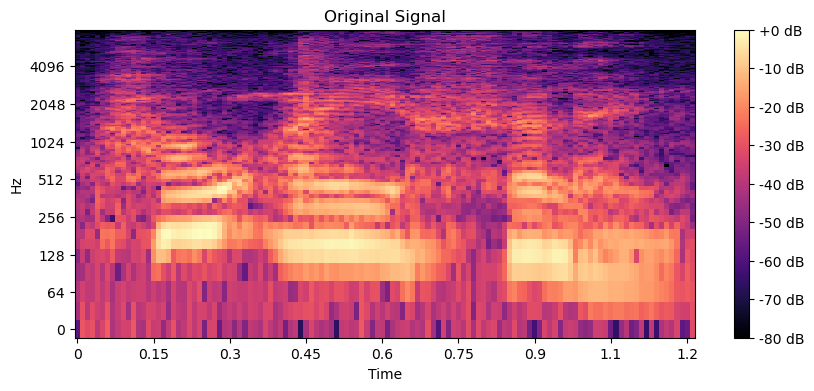

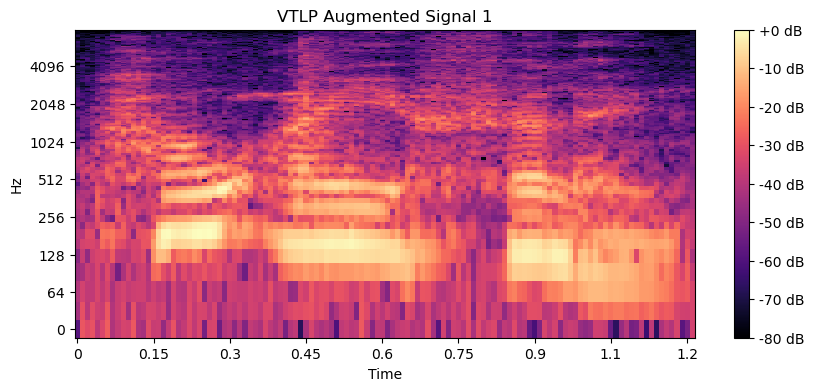

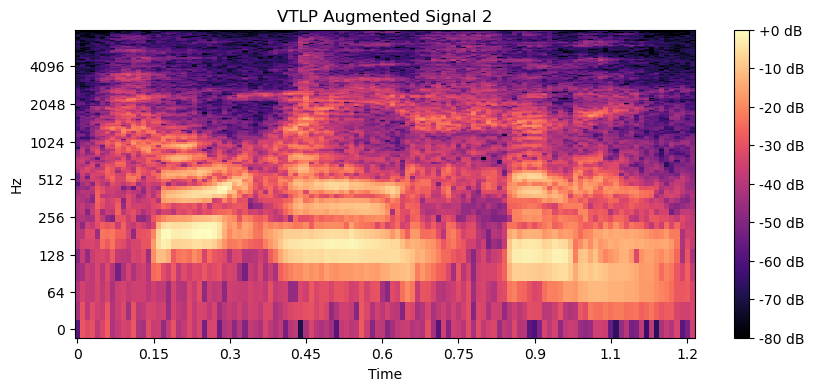

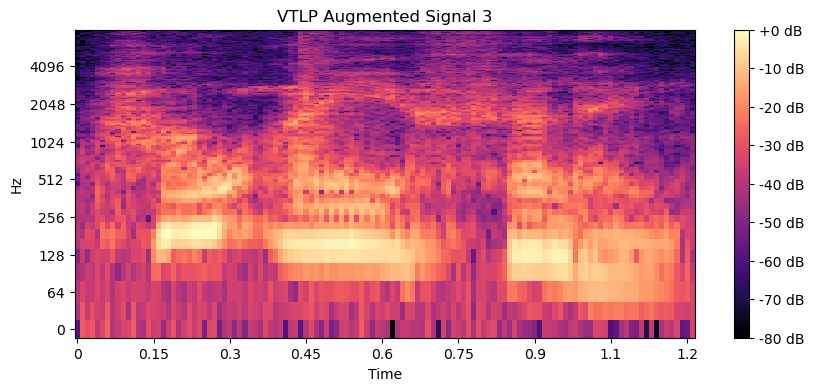

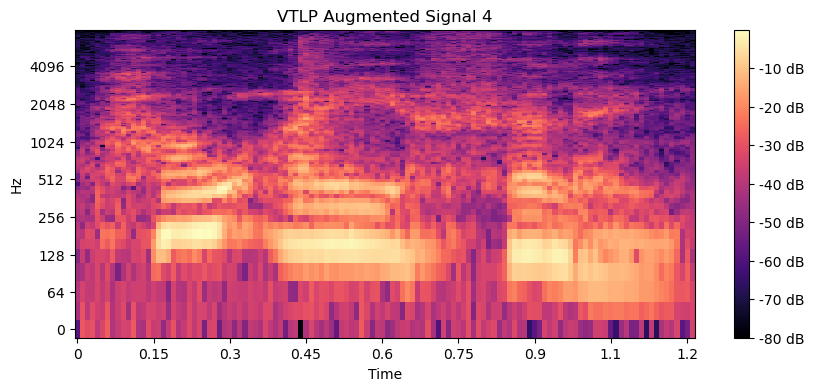

In [7]:
def plot_spectrogram(signal, sr, title):
    stft = librosa.stft(signal, n_fft=512, hop_length=160, win_length=400, window='hann')
    magnitude = np.abs(stft)
    log_magnitude = librosa.amplitude_to_db(magnitude, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_magnitude, sr=sr, hop_length=160, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the spectrogram of the original signal
plot_spectrogram(signal, sr, 'Original Signal')

# Plot the spectrograms of the augmented signals
for i in range(num_augmentations):
    augmented_signal, sr = librosa.load(f'{output_dir}health_sample_1_vtlp_augmented_{i+1}.wav', sr=16000)
    plot_spectrogram(augmented_signal, sr, f'VTLP Augmented Signal {i+1}')